# Statistik med Python - introduktion
För statistisk analys av datamaterial kommer vi i denna kursen använda oss av python-biblioteken Pandas, Scipy, Matplotlib och Numpy. Basfärdigheter i Pythonprogrammering antas att ni redan stött på i tidigare kurser.

Vi börjar här att introducera Pandas och Matplotlib.
Pandas biblioteket använder vi för att läsa in och hantera data, samt för att utföra deskriptiv statistik.
Matplotlib är ett grafiskt verktyg som vi använder för att illustrera vår data och kommunicera vår analys visuellt.


In [2]:
import pandas as pd

För att läsa in data till en s.k DataFrame (matris med kolumn-namn) kan man använda relativ och absolut sökväg. Enklast är att lägga datafilen i samma mapp som sin python kod. Då kan man använda filnamnet direkt, men för detta behöver ni ha t.ex. JyputerLabs installerat.

Här använder jag google Colab, så då mountar jag först min google drive för att sedan ladda upp datafilen med hela dess sökväg.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
raw_data = pd.read_csv("energi-forbrukning.csv")

I detta fall är vår datafil en .csv fil (comma-separated values fil) där kolumner är separerade med "," och rader med " ". Csv filer kan vara formaterade på olika sätt, så olika parameterar kan behövas i .read_csv() kallet för att läsa in filen korrekt. Lättast är att undersöka .csv filen som en .txt och se vad som använts.

När vi har vår datafil inläst i en Pandas DataFrame kan vi kalla på funktionen .head(10) för att se de första 10 observationerna i matrisen.

In [4]:
raw_data.head(10)

,export,"jord- o. skogsbruk o.d. jämte anslutna hushåll med förbr. över 20 000 kWh, SNI2007 jmf. 01, 02 och 03","jord- o. skogsbruk o. d. jämte anslutna hushåll med förbr. högst 20 000 kWh, SNI2007 jmf. 01, 02 och 03","tillverkning och utvinning av mineraler, SNI2007 jmf. 5-33","elförsörjning (kontor, lager o.d.), SNI2007 jmf. 35.1","gasförsörjning (distr. av gasformiga bränslen via rörnät), SNI2007 jmf. 35.2","försörjning av värme och kyla, värmeverksdrift, SNI2007 jmf. 35.3","försörjning av värme och kyla, elpannor och värmepumpar, SNI2007 jmf. 35.3",gatu- och vägbelysning,"vattenverk och avloppsrening, SNI2007 jmf. 36.001, 36.002",...,"permanenta bostäder, flerbostadshus, direktlev. med förbrukning över 5 000 kWh","permanenta bostäder, flerbostadshus, direktlev. med förbrukning högst 5 000 kWh","permanenta bostäder, flerbostadshus, kollektivleveranser",fritidsbostäder,summa slutlig förbrukning inom landet exkl. förluster,stamnätsförluster,förluster exkl stamnätsförluster,summa slutlig förbrukning inom landet inkl. förluster,summa förbrukad el,år
0,14716,1644,1004,56625,113,76,1906,1721,637,0,...,1131,4347,516,2320,133544,2898,7558,144000,158716,2008
1,9085,2072,973,50657,131,131,1983,1634,746,556,...,1396,4203,476,2998,128303,2684,6899,137886,146971,2009
2,12853,2289,895,53359,165,93,2007,1603,860,613,...,1461,4276,502,3263,135178,2420,9393,146991,159844,2010
3,19714,1996,997,53843,208,90,2063,1333,686,523,...,1737,4321,577,2749,130579,2522,7194,140295,160009,2011
4,31254,2184,966,52981,197,123,2094,1793,686,497,...,1598,4219,588,3043,131904,3476,7490,142870,174124,2012
5,22676,2143,966,50935,205,110,2001,1459,647,503,...,1584,4180,541,2964,129192,2824,7179,139195,161872,2013
6,29475,2029,969,49552,162,118,1940,1804,624,523,...,1363,4193,493,2851,125041,3087,6205,134333,163808,2014
7,31894,2170,979,48784,214,129,1910,1474,638,515,...,1385,4210,502,3047,126797,3234,6305,136336,168230,2015
8,26022,2215,1012,49506,222,168,2088,1443,626,525,...,1436,4195,422,3212,130095,3076,7593,140764,166786,2016
9,30888,2028,832,49063,174,114,2172,1544,601,484,...,1098,4140,777,3040,130460,3423,7606,141489,172377,2017


För att välja vissa kolumner (och spara dem i en ny DataFrame) kan vi göra följande:

In [4]:
df = raw_data[['export','fritidsbostäder','år']]

In [5]:
df.head(10)

,export,fritidsbostäder,år
0,14716,2320,2008
1,9085,2998,2009
2,12853,3263,2010
3,19714,2749,2011
4,31254,3043,2012
5,22676,2964,2013
6,29475,2851,2014
7,31894,3047,2015
8,26022,3212,2016
9,30888,3040,2017


Vi kan titta på kolumnen "export" för sig själv, och undersöka dess medelvärde och variationsbredd med följande Pandas funktioner:

In [6]:
df["export"].mean()

25997.571428571428

In [7]:
df["export"].dtypes

dtype('int64')

In [8]:
df["export"].max() - df["export"].min()

27739

## Varians och kovarians
Vi får fram en kovariansmatris av utvalda kolumner genom Pandas funktionen .cov()

In [9]:
df[["export","fritidsbostäder"]].cov()

,export,fritidsbostäder
export,7.783214e+07,466797.714286
fritidsbostäder,4.667977e+05,60412.027473


## Korrelation

In [10]:
df[["export","fritidsbostäder"]].corr()

,export,fritidsbostäder
export,1.000000,0.215272
fritidsbostäder,0.215272,1.000000


## Grafiska metoder - Matplotlib

Matplotlib är ett kraftfullt verktyg för att visualisera vår data, men kan till en början vara lite förvirrande och kräva en del arbete för att få till snyggt i mer involverade plottar.

Jag rekommenderar att skumma igenom denna guide https://realpython.com/python-matplotlib-guide/ för att få en bättre förståelse om hur en plot är uppbyggd. Speciellt för att se hur en plot består av en figure tillsammans med axes.



In [11]:
import matplotlib.pyplot as plt

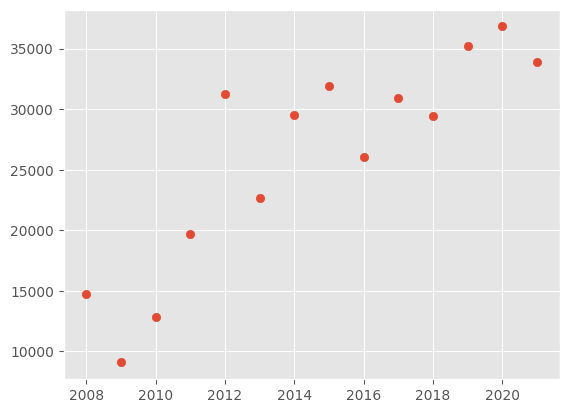

In [12]:
plt.style.use("ggplot")# Färg-tema

fig,ax = plt.subplots() # skapar en figur samt en axel (x-axel)
ax.scatter(df.år,df.export)
plt.show()

## Konfiguration

Matplotlib kan konfigureras på många sätt. Här följer några standard-inställningar som är användbara

* ax.set_xlim (Bestämmer vilket interval x-axeln ska ha)
* ax.set_ylim (Bestämmer vilket interval y-axeln ska ha)
* ax.set_ylabel (Bestämmer vilken titel y-axeln ska ha)
* ax.set_xlabel (Bestämmer vilken titel y-axeln ska ha)
* ax.set_title (Ger grafen en titel)
* ax.legend (Lägger till en info ruta vilken graf som motsvarar vilken data)

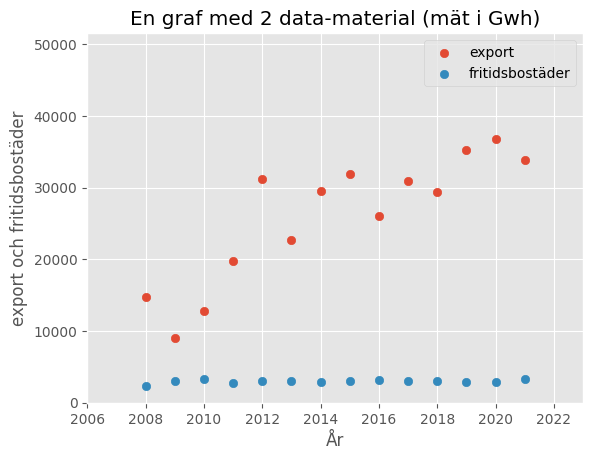

In [13]:
fig , ax = plt.subplots()
ax.scatter(df["år"],df["export"],label="export")
ax.scatter(df["år"],df["fritidsbostäder"],label="fritidsbostäder")
ax.set_xlim(df.år.min()-2,df.år.max()+2)
ax.set_ylim(0,1.4*df.export.max())
ax.set_xlabel("År")
ax.set_ylabel("export och fritidsbostäder")
ax.set_title("En graf med 2 data-material (mät i Gwh)")
ax.legend()
plt.show()

Matplotlib kan göra andra diagram än punktdiagram (scatter).
Några exempel är:

* Lådagram med funktionen boxplot
* Histogram med funktionen hist

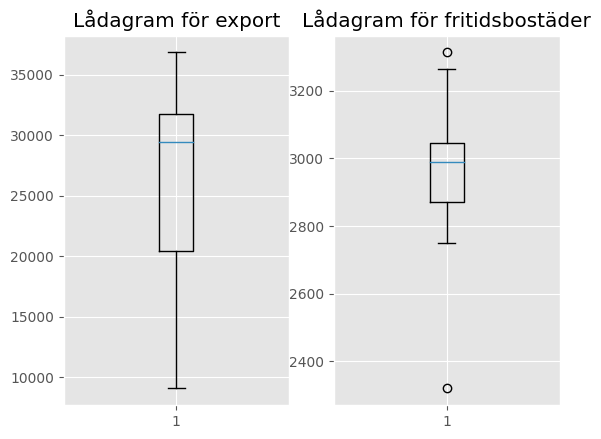

In [14]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
ax1.boxplot(df["export"])
ax1.set_title("Lådagram för export")
ax2.boxplot(df["fritidsbostäder"])
ax2.set_title("Lådagram för fritidsbostäder")
plt.show()

# Extra material
Mer information om dessa paket finns i dokumentationen

* Pandas http://pandas.pydata.org/docs/
* Matplotlib https://matplotlib.org/stable/index.html
* Matplotlib tutorials https://matplotlib.org/stable/tutorials/index.html

Datafilen är adapterad från följande SCB-statistik: https://www.statistikdatabasen.scb.se/pxweb/sv/ssd/START__EN__EN0105__EN0105A/ElAnvSNI2007Ar/